In [1]:
import os
from typing import List, Set, Dict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from artificial_bias_experiments.evaluation.confidence_comparison.df_utils import ColumnNamesInfo, \
    get_df_diffs_between_true_conf_and_confidence_estimators_melted, \
    get_df_rulewise_fraction_of_conf_estimator_to_true_conf
from artificial_bias_experiments.image_generation.image_generation_utils import \
    get_confidence_difference_label_string

from artificial_bias_experiments.known_prop_scores.scar.image_generation.known_prop_scores_scar_generate_images import (
    _get_rule_wrappers_as_dataframe
)

from artificial_bias_experiments.known_prop_scores.scar.known_prop_scores_scar_file_naming import \
    KnownPropScoresSCARConstantLabelFreqFileNamer
from kbc_pul.confidence_naming import ConfidenceEnum
from kbc_pul.experiments_utils.color_utils import matplotlib_color_name_to_hex
from kbc_pul.experiments_utils.file_utils import print_file_exists

sns.set(style="whitegrid")


%load_ext autoreload
%autoreload 2

# Paper Image Q1: Known prop score, SCAR - IPW & CWA conf

## Import the rule wrappers

In [2]:
dataset_name: str = "yago3_10"
target_relation: str = "created"
# target_relation: str = "participatedin"

label_frequency_list: List[float] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
random_seed: int = 3

is_pca_version: bool = False

In [3]:
pca_indicator: str = "not_pca"
true_conf: ConfidenceEnum = ConfidenceEnum.TRUE_CONF
conf_estimators_to_ignore: Set[ConfidenceEnum] = {ConfidenceEnum.ICW_CONF}

## Convert rule wrappers to dataframe

In [4]:
root_dir_experiment_settings: str = KnownPropScoresSCARConstantLabelFreqFileNamer.get_dir_experiment_high_level(
    dataset_name=dataset_name,
    target_relation=target_relation,
    is_pca_version=is_pca_version
)

image_dir: str = KnownPropScoresSCARConstantLabelFreqFileNamer.get_dir_images(
    use_pca=is_pca_version,
    dataset_name=dataset_name,
)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
print_file_exists(image_dir)

? file exists: /home/joschout/Documents/Repos/KUL-PUL/images/artificial_bias_experiments/known_prop_scores/scar/not_pca/yago3_10
-> True


In [5]:
df_rule_wrappers: pd.DataFrame = _get_rule_wrappers_as_dataframe(
    root_dir_experiment_settings=root_dir_experiment_settings,
    target_relation=target_relation
)

In [6]:
df_rule_wrappers.head()

,target_relation,label_frequency,random_trial_index,Rule,Nb supported predictions,Body size,$conf$,IPW,CWA,ICW,$\frac{\left| \mathbf{R}\right|}{\left| \mathbf{R_s}\right|} conf$ $p$,PCA $p$,IPW-PCA $p$,$\frac{\left| \mathbf{R}\right|}{\left| \mathbf{R_s}\right|} conf$ $p^{-1}$,PCA ${p^{-1}}$,IPW-PCA ${p^{-1}}$
0,created,0.1,7,"created(A,B) :- directed(A,B)",120,5481,0.219303,0.218938,0.021894,0.218938,0.427910,0.162822,0.162822,0.326364,0.218978,0.218978
1,created,0.1,6,"created(A,B) :- directed(A,B)",97,5481,0.219303,0.176975,0.017698,0.176975,0.427910,0.146305,0.146305,0.326364,0.181989,0.181989
2,created,0.1,1,"created(A,B) :- directed(A,B)",117,5481,0.219303,0.213465,0.021346,0.213465,0.427910,0.165488,0.165488,0.326364,0.216667,0.216667
3,created,0.1,9,"created(A,B) :- directed(A,B)",109,5481,0.219303,0.198869,0.019887,0.198869,0.427910,0.165653,0.165653,0.326364,0.194643,0.194643
4,created,0.1,8,"created(A,B) :- actedin(A,B),directed(A,B)",22,558,0.379928,0.394265,0.039427,0.394265,0.566845,0.224490,0.224490,0.566845,0.511628,0.511628


In [7]:
df_rule_wrappers.columns

Index(['target_relation', 'label_frequency', 'random_trial_index', 'Rule',
       'Nb supported predictions', 'Body size', '$conf$', 'IPW', 'CWA', 'ICW',
       '$\frac{\left| \mathbf{R}\right|}{\left| \mathbf{R_s}\right|} conf$ $p$',
       'PCA $p$', 'IPW-PCA $p$',
       '$\frac{\left| \mathbf{R}\right|}{\left| \mathbf{R_s}\right|} conf$ $p^{-1}$',
       'PCA ${p^{-1}}$', 'IPW-PCA ${p^{-1}}$'],
      dtype='object')

In [8]:
column_names_logistics: List[str] = [
    'target_relation',
    'label_frequency',
    'random_trial_index',
    "Rule"
]

## Which rules are included?

In [9]:
list_of_rules: List[str] = list(df_rule_wrappers["Rule"].unique())
for rule_str in list_of_rules:
    print(rule_str)



created(A,B) :- directed(A,B)
created(A,B) :- actedin(A,B),directed(A,B)


## Select only 1 rule

In [10]:
index_of_rule_to_use = 1

df_rule_wrappers = df_rule_wrappers[
    (df_rule_wrappers["Rule"] == list_of_rules[index_of_rule_to_use])
    # & (df_rule_wrappers["random_trial_index"] == 0)
]
rule_name: str = list_of_rules[index_of_rule_to_use]



## True Conf vs non-pca estimators

In [11]:
conf_estimators_non_pca_comparison = [
    ConfidenceEnum.IPW_CONF,
    ConfidenceEnum.CWA_CONF,
]

confs_non_pca_comparison = [ConfidenceEnum.TRUE_CONF ] + conf_estimators_non_pca_comparison

column_names_non_pca_confidence_comparison = [
    conf.get_name()
    for conf in confs_non_pca_comparison
]

In [12]:
df_non_pca_conf_comp = df_rule_wrappers[
    column_names_logistics + column_names_non_pca_confidence_comparison
]
df_non_pca_conf_comp.head()

,target_relation,label_frequency,random_trial_index,Rule,$conf$,IPW,CWA
4,created,0.1,8,"created(A,B) :- actedin(A,B),directed(A,B)",0.379928,0.394265,0.039427
5,created,0.1,7,"created(A,B) :- actedin(A,B),directed(A,B)",0.379928,0.448029,0.044803
7,created,0.1,0,"created(A,B) :- actedin(A,B),directed(A,B)",0.379928,0.358423,0.035842
8,created,0.1,9,"created(A,B) :- actedin(A,B),directed(A,B)",0.379928,0.394265,0.039427
9,created,0.1,3,"created(A,B) :- actedin(A,B),directed(A,B)",0.379928,0.286738,0.028674


In [13]:
df_non_pca_conf_comp_melted = df_non_pca_conf_comp.melt(
    id_vars=column_names_logistics,
    var_name='confidence_type',
    value_name='confidence_value'
)
df_non_pca_conf_comp_melted.head()

,target_relation,label_frequency,random_trial_index,Rule,confidence_type,confidence_value
0,created,0.1,8,"created(A,B) :- actedin(A,B),directed(A,B)",$conf$,0.379928
1,created,0.1,7,"created(A,B) :- actedin(A,B),directed(A,B)",$conf$,0.379928
2,created,0.1,0,"created(A,B) :- actedin(A,B),directed(A,B)",$conf$,0.379928
3,created,0.1,9,"created(A,B) :- actedin(A,B),directed(A,B)",$conf$,0.379928
4,created,0.1,3,"created(A,B) :- actedin(A,B),directed(A,B)",$conf$,0.379928


In [14]:
n_rules = len(df_non_pca_conf_comp["Rule"].unique())
print(n_rules)

n_random_trials = len(df_non_pca_conf_comp["random_trial_index"].unique())
print(n_random_trials)

1
10


In [15]:
column_names_info =ColumnNamesInfo(
        true_conf=true_conf,
        column_name_true_conf=true_conf.get_name(),
        conf_estimators=conf_estimators_non_pca_comparison,
        column_names_conf_estimators=[
            col.get_name()
            for col in conf_estimators_non_pca_comparison
        ],
        column_names_logistics=column_names_logistics
    )

df_diff_to_true_conf_melted: pd.DataFrame = get_df_diffs_between_true_conf_and_confidence_estimators_melted(
    df_rule_wrappers=df_non_pca_conf_comp,
    column_names_info = column_names_info
)


### Plot True conf, CWA conf and IPW conf

In [16]:
from kbc_pul.confidence_naming import get_color_dict_q1

color_dict_q1: Dict[ConfidenceEnum, str] = get_color_dict_q1()

color_palette = {
    conf.get_name(): color_dict_q1[conf]
    for conf in confs_non_pca_comparison
}


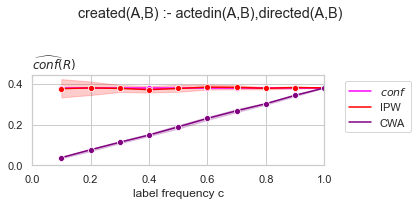

In [17]:
from matplotlib.axes import Axes
from matplotlib.figure import Figure

figsize = (6, 3)
fig, axes = plt.subplots(1,1, figsize=figsize)

error_metric_label: str = get_confidence_difference_label_string(true_conf)

fig: Figure
axes: Axes
ax_confs: Axes = sns.lineplot(
    x="label_frequency",
    y='confidence_value',
    hue="confidence_type",
    # hue_order=order,
    palette=color_palette,
    marker="o",
    data=df_non_pca_conf_comp_melted,
    ax=axes
)
ax_confs.set_xlim([0.0, 1.0])
ax_confs.set_ylim([0.0, None])
ax_confs.set_xlabel(f'label frequency c')
# ax_confs.set_ylabel("$\widehat{conf}(R)$")
ax_confs.set_ylabel("")
ax_confs.set_title(
    "$\widehat{conf}(R)$",
    loc="left"
     # f" for {n_rules} rules predicting {target_relation}\n"
     # f" (Avg over {n_random_trials} random selections)"
             )

# ax_squared_error: Axes = sns.lineplot(
#     x="label_frequency",
#     y='squared_error',
#     hue="error_type",
#     # hue_order=order,
#     palette=color_palette,
#     marker="o",
#     data=df_diff_to_true_conf_melted,
#     ax=axes[1]
# )
# # ax_confs.legend_ = leg
#
#
# ax_squared_error.set_xlim([0.0, 1.0])
# ax_squared_error.set_ylim([0.0, None])
# ax_squared_error.set_xlabel(f'label frequency c')
# ax_squared_error.set_ylabel(error_metric_label)
# ax_squared_error.set_title(
#     "" + error_metric_label + ""
#              # f" for {n_rules} rules predicting {target_relation}\n"
#              f" (Avg over {n_random_trials} random selections)"
# )
# ax_squared_error.get_legend().remove()

plt.suptitle(f"{rule_name}")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])